分类错误个数： 2
TP:44,FP:2,TN:153,FN:0


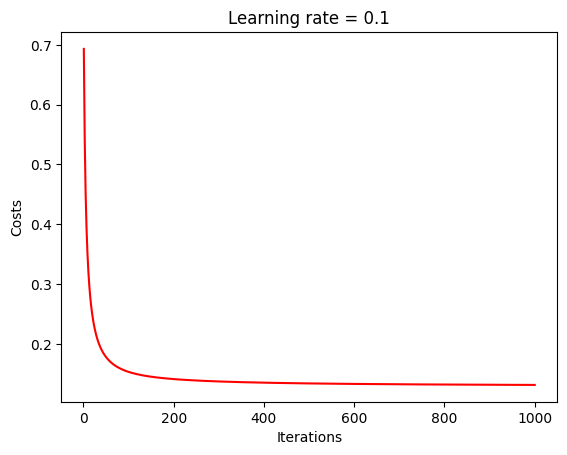

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
#特征缩放
def Feature_scaling(data,d):#data：数据集,d：维度
    x_mean=np.mean(data[:,:d],axis=0)
    x_std=np.std(data[:,:d],axis=0,ddof=1)
    data[:,:d]=(data[:,:d]-x_mean)/x_std
#划分数据集
def split_dataset(data,m_train,m_all,d):#dada：数据集，m_train:训练集大小,m_all：数据集大小，d：维度
    x_train=data[:m_train,:d].T
    y_train=data[:m_train,d].reshape(1,-1)
    x_test=data[m_train:,:d].T
    y_test=data[m_train:,d].reshape(1,-1)
    train_set=data[:m_train,:]
    return x_train,y_train,x_test,y_test,train_set
#对数据进行训练
def Train(iteration,learning_rate,batch_size,train_set):#iteration：迭代次数,learning_rate：学习率,batch_size：批长,train_set：训练集
    rng=np.random.default_rng(1)
    w=np.zeros((1,d)).reshape(-1,1)
    b=0
    cost_save=[]
    for i in range(iteration):
        rng.shuffle(train_set)
        for start_sample in range(0,m_train,batch_size):
            batch_sample=min([batch_size,m_train-start_sample])
            v=np.ones((1,batch_sample)).reshape(1,-1)
            X=train_set[start_sample:batch_sample+start_sample,:d].T
            Y=train_set[start_sample:batch_sample+start_sample,d].T
            z=np.dot(w.T,X)+b
            y_hat=1./(1+np.exp(-z)) 
            y_hat_ba=1-y_hat   
            y_train_ba=1-Y
            e=y_hat-Y
            w=w-learning_rate*np.dot(X,e.T)/batch_size
            b=b-learning_rate*np.dot(v,e.T)/batch_size
            cost=-(np.dot(np.log(y_hat),Y.T)+np.dot(np.log(y_hat_ba),y_train_ba.T))/batch_size
            '''cost值域为0-2'''
            cost_save.append(cost.item(0))
    return w,b,cost_save
#对数据集预测
def Prediction(w,b,x,y,m_train):#w：权重，b：偏移，x：特征输入，y：实际结果，m_train：输入的长度
    z=(np.dot(w.T,x)+b)
    y_hat=1/(1+np.exp(-z))
    z=z>=0
    errors=np.sum(np.abs(z-y))
    print("分类错误个数：",errors.astype(int))
    FP=np.sum(np.logical_and(y==0,z==1))
    TP=np.sum(np.logical_and(y==1,z==1))
    TN=np.sum(np.logical_and(y==0,z==0))
    FN=np.sum(np.logical_and(y==1,z==0))
    print(f'TP:{TP},FP:{FP},TN:{TN},FN:{FN}')

#导入数据
df=pandas.read_csv('breastCancer.csv')
df=df.drop(labels='bare_nucleoli' ,axis=1)#删掉标签名为bare_nucleoli的列，此列有脏数据
df=df.drop(labels='id' ,axis=1)#删掉标签名为id的一列，此列没有用处
data=np.array(df,dtype = float)
m_all=np.shape(data)[0]#计算出数据样本总数
d=np.shape(data)[1]-1#计算出维度

#特征缩放
Feature_scaling(data,d)

#设定参数
m_train=500
m_test=m_all-m_train
iteration=1000
learning_rate=0.1
batch_size=500

x_train,y_train,x_test,y_test,train_set=split_dataset(data,m_train,m_all,d)#划分数据集
w,b,cost_saved=Train(iteration,learning_rate,batch_size,train_set=train_set)#训练参数
Prediction(w,b,x_test,y_test,m_test)#训练集分类预测

plt.ylabel('Costs')
plt.xlabel('Iterations')
plt.title('Learning rate = ' + str(learning_rate))
plt.plot(range(1,len(cost_saved)+1),cost_saved,'r')
plt.show()

